<h1> Data Scaling & Model Building with Balanced Data </h1>

In this notebook we balance the data to have an equal number of fair catches and not fair catches so the model can't just predict the punt will be not be a fair catch and be accurate 70% of the time. We then build different models to find the best model for our problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib
from sklearn import tree
from collections import Counter

In [2]:
df = pd.read_csv('punt_df2.csv')

We dropped columns that consisted of mostly missing values. 

In [3]:
df = df.drop(columns=['Unnamed: 0','kickoffReturnFormation','returnDirectionIntended','kickDirectionActual.1','down',
                                 'penaltyCodes','penaltyYards'])

We did some data exploration looking at the spread of our data. We are looking at how many punts resulted in fair catch or returns. We also Verifying that our data has 5 possible value for the quarter column, with the value of 5 accounting for over time.

In [5]:
df["specialTeamsResult"].value_counts()/5366
#df.loc[df['specialTeamsResult'] == "Fair Catch"]

Return                      0.426016
Fair Catch                  0.305628
Downed                      0.154491
Touchback                   0.071375
Muffed                      0.028699
Non-Special Teams Result    0.013791
Name: specialTeamsResult, dtype: float64

In [6]:
df["quarter"].unique()
df.loc[df['quarter'] == 5] #okay so there are 5 quarters

,gameId,playId,snapDetail,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,kickContactType,quarter,...,P22_t25_dis,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir
34,2018090901,4648,OK,2.17,4.34,N,R,R,CC,5,...,0.37,185.36,77.55,50.03,7.26,5.40,1.59,0.53,98.86,70.15
35,2018090901,4833,OK,2.27,4.98,N,C,C,CC,5,...,0.26,289.51,279.60,79.31,10.70,3.06,1.44,0.30,270.34,262.64
138,2018091602,4457,<,2.26,4.54,A,C,C,BF,5,...,0.47,36.86,79.96,69.17,41.11,6.09,3.19,0.60,110.35,93.08
447,2018093009,5285,OK,2.02,4.12,N,C,C,CC,5,...,0.33,336.70,64.42,72.23,27.96,3.84,0.59,0.38,333.88,61.74
515,2018100703,4645,OK,2.08,4.36,A,L,L,CC,5,...,0.11,307.03,167.80,68.33,27.03,2.85,3.49,0.27,299.29,221.26
516,2018100703,4855,OK,2.09,4.76,N,C,C,CC,5,...,0.09,290.91,120.72,74.33,27.96,2.13,3.84,0.21,269.78,227.53
572,2018100712,4211,OK,2.09,4.70,A,C,C,CC,5,...,0.20,272.69,265.36,69.15,30.58,1.51,1.85,0.16,266.61,245.75
757,2018102109,4445,OK,2.12,4.46,N,R,R,CC,5,...,0.32,29.77,101.89,87.36,27.42,2.57,2.76,0.26,58.76,132.34
758,2018102109,4666,OK,2.07,4.35,N,C,C,DEZ,5,...,0.21,34.26,63.67,59.58,32.97,2.06,2.04,0.21,102.15,26.06
759,2018102109,4748,OK,2.00,4.65,N,C,C,CC,5,...,0.18,242.81,287.13,28.55,29.06,0.60,3.19,0.06,31.38,205.17


In [7]:
df.loc[df['specialTeamsResult'] == "Fair Catch"]

,gameId,playId,snapDetail,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,kickContactType,quarter,...,P22_t25_dis,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir
2,2018090600,973,OK,2.19,4.98,N,L,L,CC,2,...,0.39,137.01,261.71,14.11,27.14,3.19,2.72,0.32,142.72,244.21
5,2018090600,2406,OK,2.04,4.69,N,C,C,CC,3,...,0.23,74.34,77.99,72.39,30.19,1.62,1.24,0.17,67.37,68.41
21,2018090900,4325,OK,2.08,3.80,A,R,R,CC,4,...,0.13,78.48,114.83,65.90,26.45,1.50,1.36,0.15,70.08,166.53
29,2018090901,2907,OK,2.14,4.22,A,L,L,CC,3,...,0.17,252.94,128.13,61.73,20.15,2.16,1.57,0.22,263.78,155.38
30,2018090901,3215,OK,2.28,4.08,A,L,L,CC,4,...,0.11,69.24,55.82,47.50,22.63,1.11,2.07,0.10,69.64,301.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,2021010314,1771,OK,2.20,4.67,N,C,C,CC,2,...,0.68,95.85,91.49,47.56,44.17,7.75,1.99,0.77,107.72,99.38
5357,2021010315,283,OK,2.03,4.25,A,L,L,CC,1,...,0.44,216.03,265.81,38.61,34.51,1.69,5.90,0.19,213.37,301.41
5358,2021010315,386,OK,2.00,4.76,N,R,R,CC,1,...,0.54,343.71,329.98,79.69,16.23,7.16,3.47,0.71,317.47,310.85
5359,2021010315,553,H,2.10,4.63,N,L,L,CC,1,...,0.37,34.54,66.41,40.48,11.37,4.87,1.73,0.48,48.96,78.94


In [8]:
df.loc[df['specialTeamsResult'] == "Return"]

,gameId,playId,snapDetail,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,kickContactType,quarter,...,P22_t25_dis,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir
0,2018090600,366,OK,2.12,4.46,N,C,C,CC,1,...,0.29,234.56,239.04,13.87,32.05,1.26,5.02,0.16,232.79,208.81
4,2018090600,1989,OK,2.12,4.62,N,C,C,CC,2,...,0.17,87.27,165.12,33.93,20.29,2.85,3.29,0.27,91.30,109.31
6,2018090600,2599,OK,2.35,4.16,N,L,L,CC,3,...,0.13,112.35,294.26,32.80,24.74,2.44,4.82,0.22,123.40,63.68
9,2018090600,3868,OK,2.09,4.40,N,C,C,CC,4,...,0.33,262.63,73.30,87.03,26.96,1.87,4.04,0.19,239.71,26.35
10,2018090900,485,OK,2.11,4.34,N,C,R,CC,1,...,0.16,62.50,83.86,85.52,27.32,1.17,3.27,0.10,63.69,181.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,2021010315,928,OK,2.06,4.43,N,L,L,CC,1,...,0.66,70.63,89.15,44.53,9.85,8.10,2.08,0.81,60.30,81.68
5361,2021010315,1359,H,2.23,4.50,N,L,L,CC,2,...,0.73,239.92,264.21,81.01,42.26,8.02,2.08,0.80,230.31,255.97
5362,2021010315,1479,OK,2.07,4.80,N,R,R,CC,2,...,0.51,196.28,153.07,36.96,40.09,7.03,2.89,0.69,153.27,143.08
5363,2021010315,2235,OK,2.08,3.36,N,C,C,CC,3,...,0.62,184.74,159.87,39.97,37.73,7.70,2.22,0.76,161.90,150.72


Starting one hot encoding for our categorical values. Here we create dummies for every field that needs to be encoded into binary columns. Then we concatenate the dummies into the dataframe now called df1 then we drop the original columns that contained the information

In [10]:
dfsnap =pd.get_dummies(df["snapDetail"],prefix="snap")
dfkt =pd.get_dummies(df["kickType"],prefix="kicktype")
dfdi =pd.get_dummies(df["kickDirectionIntended"], prefix="kickDirintended")
dfka= pd.get_dummies(df["kickDirectionActual"],prefix="kickDirActual")
dfqu=pd.get_dummies(df["quarter"], prefix="quarter")
dfstr=pd.get_dummies(df['specialTeamsResult'],prefix="result")
dfpd=pd.get_dummies(df['playDirection'],prefix="playDirection")

In [11]:
df1= pd.concat([dfsnap,dfkt,dfdi,dfka,dfqu,dfstr,dfpd,df], axis=1) #dropped kickcontacttpe bc dataleakage
df1= df1.drop(columns=['snapDetail', 'kickType','kickDirectionIntended','kickDirectionActual','kickContactType','quarter','specialTeamsResult','playDirection','playResult'])
df1
#array of column names


,snap_<,snap_>,snap_H,snap_L,snap_OK,kicktype_A,kicktype_N,kicktype_R,kickDirintended_C,kickDirintended_L,...,P22_t25_dis,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir
0,0,0,0,0,1,0,1,0,1,0,...,0.29,234.56,239.04,13.87,32.05,1.26,5.02,0.16,232.79,208.81
1,0,0,0,0,1,0,1,0,1,0,...,0.36,261.29,298.83,41.28,32.59,3.61,2.63,0.37,271.19,321.46
2,0,0,0,0,1,0,1,0,0,1,...,0.39,137.01,261.71,14.11,27.14,3.19,2.72,0.32,142.72,244.21
3,0,0,0,0,1,0,1,0,0,0,...,0.30,81.98,71.33,83.63,30.32,1.51,1.80,0.16,63.54,75.25
4,0,0,0,0,1,0,1,0,1,0,...,0.17,87.27,165.12,33.93,20.29,2.85,3.29,0.27,91.30,109.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,0,0,1,0,0,0,1,0,0,1,...,0.73,239.92,264.21,81.01,42.26,8.02,2.08,0.80,230.31,255.97
5362,0,0,0,0,1,0,1,0,0,0,...,0.51,196.28,153.07,36.96,40.09,7.03,2.89,0.69,153.27,143.08
5363,0,0,0,0,1,0,1,0,1,0,...,0.62,184.74,159.87,39.97,37.73,7.70,2.22,0.76,161.90,150.72
5364,0,0,0,0,1,0,1,0,1,0,...,0.51,198.05,152.45,39.46,39.41,6.62,1.73,0.65,176.24,146.87


Continuing to format the data to be compatible with model building. Getting rid of string values with binary values and reformatting time columns. Also dropping more columns that do not seem to be necessary for the model.

In [12]:
df1 = df1.drop(columns = ['possessionTeam','homeTeamAbbr','visitorTeamAbbr','yardlineSide'])

In [13]:
df1['gameClock'] = pd.to_datetime(df1['gameClock']).astype('int64')
# df1['gameClock'][:5]

In [14]:
df1[df1.columns[df1.isnull().sum() > 0]].isnull().sum()

operationTime          75
hangTime               80
kickLength             74
kickReturnYardage    3011
dtype: int64

In [15]:
df1.drop(columns=['operationTime', 'hangTime', 'kickLength', 'kickReturnYardage'], inplace=True)

In [16]:
df1.drop(columns=['result_Downed', 'result_Muffed', 
                  'result_Non-Special Teams Result', 'result_Return', 'result_Touchback'],
                 inplace=True)
         

In [17]:
# moves fair catch prediction column to the end of the dataframe
df1 = df1[[c for c in df1 if c not in ['result_Fair Catch']] 
       + ['result_Fair Catch']]

We define a few functions that will allow us to easily analyze the results of different models after build the,.

In [18]:
def print_analysis(y_pred,y_v):
    cnf_matrix = metrics.confusion_matrix(y_v, y_pred)
    print("Confusion matrix: ")
    print(cnf_matrix)
    print("")
    print("Accuracy:",round(metrics.accuracy_score(y_v, y_pred),4))
    print("Precision:",round(metrics.precision_score(y_v, y_pred, zero_division=1),4))
    print("Recall:",round(metrics.recall_score(y_v, y_pred),4))

    auc = metrics.roc_auc_score(y_v, y_pred)
    print("AUC:",round(auc,4))
    print("")
    return
def calculation(model_name,x,y,xv,yv):
    model = model_name
    model_name.fit(x,y)
    y_pred = model_name.predict(xv)
    print_analysis(y_pred,yv)
    return
def printCols(data):
    n=0
    for i in data.columns:
        print(i,n)
        n=n+1

In [19]:
df1 = df1.loc[:,~df1.columns.duplicated()]
printCols(df1)

snap_< 0
snap_> 1
snap_H 2
snap_L 3
snap_OK 4
kicktype_A 5
kicktype_N 6
kicktype_R 7
kickDirintended_C 8
kickDirintended_L 9
kickDirintended_R 10
kickDirActual_C 11
kickDirActual_L 12
kickDirActual_R 13
quarter_1 14
quarter_2 15
quarter_3 16
quarter_4 17
quarter_5 18
playDirection_left 19
playDirection_right 20
gameId 21
playId 22
yardsToGo 23
yardlineNumber 24
gameClock 25
preSnapHomeScore 26
preSnapVisitorScore 27
absoluteYardlineNumber 28
nflId 29
puntPlay 30
P1_t0_x 31
P1_t0_y 32
P1_t0_s 33
P1_t0_a 34
P1_t0_dis 35
P1_t0_o 36
P1_t0_dir 37
P1_t5_x 38
P1_t5_y 39
P1_t5_s 40
P1_t5_a 41
P1_t5_dis 42
P1_t5_o 43
P1_t5_dir 44
P1_t10_x 45
P1_t10_y 46
P1_t10_s 47
P1_t10_a 48
P1_t10_dis 49
P1_t10_o 50
P1_t10_dir 51
P1_t15_x 52
P1_t15_y 53
P1_t15_s 54
P1_t15_a 55
P1_t15_dis 56
P1_t15_o 57
P1_t15_dir 58
P1_t20_x 59
P1_t20_y 60
P1_t20_s 61
P1_t20_a 62
P1_t20_dis 63
P1_t20_o 64
P1_t20_dir 65
P1_t25_x 66
P1_t25_y 67
P1_t25_s 68
P1_t25_a 69
P1_t25_dis 70
P1_t25_o 71
P1_t25_dir 72
P1_t30_x 73
P1_t30_

P19_t10_dir 933
P19_t15_x 934
P19_t15_y 935
P19_t15_s 936
P19_t15_a 937
P19_t15_dis 938
P19_t15_o 939
P19_t15_dir 940
P19_t20_x 941
P19_t20_y 942
P19_t20_s 943
P19_t20_a 944
P19_t20_dis 945
P19_t20_o 946
P19_t20_dir 947
P19_t25_x 948
P19_t25_y 949
P19_t25_s 950
P19_t25_a 951
P19_t25_dis 952
P19_t25_o 953
P19_t25_dir 954
P19_t30_x 955
P19_t30_y 956
P19_t30_s 957
P19_t30_a 958
P19_t30_dis 959
P19_t30_o 960
P19_t30_dir 961
P20_t0_x 962
P20_t0_y 963
P20_t0_s 964
P20_t0_a 965
P20_t0_dis 966
P20_t0_o 967
P20_t0_dir 968
P20_t5_x 969
P20_t5_y 970
P20_t5_s 971
P20_t5_a 972
P20_t5_dis 973
P20_t5_o 974
P20_t5_dir 975
P20_t10_x 976
P20_t10_y 977
P20_t10_s 978
P20_t10_a 979
P20_t10_dis 980
P20_t10_o 981
P20_t10_dir 982
P20_t15_x 983
P20_t15_y 984
P20_t15_s 985
P20_t15_a 986
P20_t15_dis 987
P20_t15_o 988
P20_t15_dir 989
P20_t20_x 990
P20_t20_y 991
P20_t20_s 992
P20_t20_a 993
P20_t20_dis 994
P20_t20_o 995
P20_t20_dir 996
P20_t25_x 997
P20_t25_y 998
P20_t25_s 999
P20_t25_a 1000
P20_t25_dis 1001
P20_t2

<h2>Model with all data including 3 seconds of tracking information</h2>

We balance the data to have an equal number of fair catches and not fair catches. We then scaled the data using MinMax scaler to prepare for model building.

In [20]:
df1['result_Fair Catch'].value_counts()

0    3726
1    1640
Name: result_Fair Catch, dtype: int64

In [21]:
fair_catches = df1[df1['result_Fair Catch'] == 1]
fair_catches

,snap_<,snap_>,snap_H,snap_L,snap_OK,kicktype_A,kicktype_N,kicktype_R,kickDirintended_C,kickDirintended_L,...,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir,result_Fair Catch
2,0,0,0,0,1,0,1,0,0,1,...,137.01,261.71,14.11,27.14,3.19,2.72,0.32,142.72,244.21,1
5,0,0,0,0,1,0,1,0,1,0,...,74.34,77.99,72.39,30.19,1.62,1.24,0.17,67.37,68.41,1
21,0,0,0,0,1,1,0,0,0,0,...,78.48,114.83,65.90,26.45,1.50,1.36,0.15,70.08,166.53,1
29,0,0,0,0,1,1,0,0,0,1,...,252.94,128.13,61.73,20.15,2.16,1.57,0.22,263.78,155.38,1
30,0,0,0,0,1,1,0,0,0,1,...,69.24,55.82,47.50,22.63,1.11,2.07,0.10,69.64,301.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,0,0,0,0,1,0,1,0,1,0,...,95.85,91.49,47.56,44.17,7.75,1.99,0.77,107.72,99.38,1
5357,0,0,0,0,1,1,0,0,0,1,...,216.03,265.81,38.61,34.51,1.69,5.90,0.19,213.37,301.41,1
5358,0,0,0,0,1,0,1,0,0,0,...,343.71,329.98,79.69,16.23,7.16,3.47,0.71,317.47,310.85,1
5359,0,0,1,0,0,0,1,0,0,1,...,34.54,66.41,40.48,11.37,4.87,1.73,0.48,48.96,78.94,1


In [22]:
not_fair_catches = df1[df1['result_Fair Catch'] == 0]
not_fair_catches

,snap_<,snap_>,snap_H,snap_L,snap_OK,kicktype_A,kicktype_N,kicktype_R,kickDirintended_C,kickDirintended_L,...,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir,result_Fair Catch
0,0,0,0,0,1,0,1,0,1,0,...,234.56,239.04,13.87,32.05,1.26,5.02,0.16,232.79,208.81,0
1,0,0,0,0,1,0,1,0,1,0,...,261.29,298.83,41.28,32.59,3.61,2.63,0.37,271.19,321.46,0
3,0,0,0,0,1,0,1,0,0,0,...,81.98,71.33,83.63,30.32,1.51,1.80,0.16,63.54,75.25,0
4,0,0,0,0,1,0,1,0,1,0,...,87.27,165.12,33.93,20.29,2.85,3.29,0.27,91.30,109.31,0
6,0,0,0,0,1,0,1,0,0,1,...,112.35,294.26,32.80,24.74,2.44,4.82,0.22,123.40,63.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5360,0,0,0,0,1,0,1,0,0,1,...,70.63,89.15,44.53,9.85,8.10,2.08,0.81,60.30,81.68,0
5361,0,0,1,0,0,0,1,0,0,1,...,239.92,264.21,81.01,42.26,8.02,2.08,0.80,230.31,255.97,0
5362,0,0,0,0,1,0,1,0,0,0,...,196.28,153.07,36.96,40.09,7.03,2.89,0.69,153.27,143.08,0
5363,0,0,0,0,1,0,1,0,1,0,...,184.74,159.87,39.97,37.73,7.70,2.22,0.76,161.90,150.72,0


In [23]:
not_fair_catches = not_fair_catches.sample(n=1640)
not_fair_catches

,snap_<,snap_>,snap_H,snap_L,snap_OK,kicktype_A,kicktype_N,kicktype_R,kickDirintended_C,kickDirintended_L,...,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir,result_Fair Catch
4856,0,0,0,0,1,0,1,0,0,1,...,133.38,29.45,93.38,24.15,1.59,4.86,0.15,230.39,310.58,0
2391,0,0,0,0,1,1,0,0,1,0,...,255.22,277.31,24.15,24.81,3.61,2.70,0.39,275.18,289.55,0
3249,0,0,0,0,1,1,0,0,1,0,...,270.22,270.26,76.92,26.98,2.53,0.29,0.25,274.07,268.31,0
775,0,0,0,0,1,0,1,0,0,0,...,75.65,90.43,81.27,21.76,3.53,1.65,0.36,64.71,109.57,0
1302,0,0,0,0,1,0,1,0,0,0,...,220.10,253.42,24.95,26.91,4.22,3.82,0.43,235.04,243.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0,0,0,0,1,0,1,0,0,0,...,30.13,302.64,57.99,26.68,4.12,0.32,0.41,37.92,301.01,0
1359,0,0,0,0,1,0,1,0,1,0,...,225.45,136.71,70.58,24.69,2.08,1.15,0.20,216.24,165.15,0
4381,0,0,1,0,0,0,1,0,0,0,...,268.21,279.32,33.39,24.19,3.71,4.26,0.39,259.17,270.88,0
4243,0,0,0,0,1,0,1,0,1,0,...,214.44,204.80,23.65,28.35,4.63,1.60,0.45,218.64,193.04,0


In [24]:
dataframes = [fair_catches, not_fair_catches]
df_balanced = pd.concat(dataframes)
df_balanced

,snap_<,snap_>,snap_H,snap_L,snap_OK,kicktype_A,kicktype_N,kicktype_R,kickDirintended_C,kickDirintended_L,...,P22_t25_o,P22_t25_dir,P22_t30_x,P22_t30_y,P22_t30_s,P22_t30_a,P22_t30_dis,P22_t30_o,P22_t30_dir,result_Fair Catch
2,0,0,0,0,1,0,1,0,0,1,...,137.01,261.71,14.11,27.14,3.19,2.72,0.32,142.72,244.21,1
5,0,0,0,0,1,0,1,0,1,0,...,74.34,77.99,72.39,30.19,1.62,1.24,0.17,67.37,68.41,1
21,0,0,0,0,1,1,0,0,0,0,...,78.48,114.83,65.90,26.45,1.50,1.36,0.15,70.08,166.53,1
29,0,0,0,0,1,1,0,0,0,1,...,252.94,128.13,61.73,20.15,2.16,1.57,0.22,263.78,155.38,1
30,0,0,0,0,1,1,0,0,0,1,...,69.24,55.82,47.50,22.63,1.11,2.07,0.10,69.64,301.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,0,0,0,0,1,0,1,0,0,0,...,30.13,302.64,57.99,26.68,4.12,0.32,0.41,37.92,301.01,0
1359,0,0,0,0,1,0,1,0,1,0,...,225.45,136.71,70.58,24.69,2.08,1.15,0.20,216.24,165.15,0
4381,0,0,1,0,0,0,1,0,0,0,...,268.21,279.32,33.39,24.19,3.71,4.26,0.39,259.17,270.88,0
4243,0,0,0,0,1,0,1,0,1,0,...,214.44,204.80,23.65,28.35,4.63,1.60,0.45,218.64,193.04,0


In [25]:
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

In [29]:
# need to encode the yardlineSide column by creating a new column 
# to keep track of whether punt is on offensive side or defensive side
X = df_balanced[df_balanced.columns[0:-1]]
y = df_balanced[['result_Fair Catch']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=0)
                                             
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# printTestTrain(X_train, X_test, y_train, y_test)


**Logistic Regression**

In [38]:
model = LogisticRegression(random_state=0, max_iter=1000)

In [39]:
model.fit(X_train_scaled, y_train.values.ravel())

LogisticRegression(max_iter=1000, random_state=0)

In [40]:
model.predict_proba(X_test) 

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [41]:
calculation(LogisticRegression(max_iter=1000),X_train_scaled,y_train.values.ravel(),X_test_scaled,y_test)

Confusion matrix: 
[[175 148]
 [153 180]]

Accuracy: 0.5412
Precision: 0.5488
Recall: 0.5405
AUC: 0.5412



In [42]:
for c in [1,2,3,4,5,6,7,8,9,10]: 
    calculation(LogisticRegression(C=c,max_iter=10000),X_train_scaled,y_train.values.ravel(),X_test_scaled,y_test)

Confusion matrix: 
[[175 148]
 [153 180]]

Accuracy: 0.5412
Precision: 0.5488
Recall: 0.5405
AUC: 0.5412

Confusion matrix: 
[[176 147]
 [154 179]]

Accuracy: 0.5412
Precision: 0.5491
Recall: 0.5375
AUC: 0.5412

Confusion matrix: 
[[174 149]
 [156 177]]

Accuracy: 0.5351
Precision: 0.5429
Recall: 0.5315
AUC: 0.5351

Confusion matrix: 
[[172 151]
 [155 178]]

Accuracy: 0.5335
Precision: 0.541
Recall: 0.5345
AUC: 0.5335

Confusion matrix: 
[[170 153]
 [154 179]]

Accuracy: 0.532
Precision: 0.5392
Recall: 0.5375
AUC: 0.5319

Confusion matrix: 
[[169 154]
 [155 178]]

Accuracy: 0.529
Precision: 0.5361
Recall: 0.5345
AUC: 0.5289

Confusion matrix: 
[[168 155]
 [156 177]]

Accuracy: 0.5259
Precision: 0.5331
Recall: 0.5315
AUC: 0.5258

Confusion matrix: 
[[168 155]
 [156 177]]

Accuracy: 0.5259
Precision: 0.5331
Recall: 0.5315
AUC: 0.5258

Confusion matrix: 
[[169 154]
 [157 176]]

Accuracy: 0.5259
Precision: 0.5333
Recall: 0.5285
AUC: 0.5259

Confusion matrix: 
[[169 154]
 [156 177]]

Accura

**SVM**

In [43]:
for c in range(1, 21,2):
    c = c / 10
    print("C: ", c)
    calculation(SVC(C = c),X_train_scaled,y_train.values.ravel(),X_test_scaled,y_test)

C:  0.1
Confusion matrix: 
[[159 164]
 [118 215]]

Accuracy: 0.5701
Precision: 0.5673
Recall: 0.6456
AUC: 0.569

C:  0.3
Confusion matrix: 
[[196 127]
 [159 174]]

Accuracy: 0.564
Precision: 0.5781
Recall: 0.5225
AUC: 0.5647

C:  0.5
Confusion matrix: 
[[193 130]
 [158 175]]

Accuracy: 0.561
Precision: 0.5738
Recall: 0.5255
AUC: 0.5615

C:  0.7
Confusion matrix: 
[[190 133]
 [146 187]]

Accuracy: 0.5747
Precision: 0.5844
Recall: 0.5616
AUC: 0.5749

C:  0.9
Confusion matrix: 
[[185 138]
 [142 191]]

Accuracy: 0.5732
Precision: 0.5805
Recall: 0.5736
AUC: 0.5732

C:  1.1
Confusion matrix: 
[[180 143]
 [142 191]]

Accuracy: 0.5655
Precision: 0.5719
Recall: 0.5736
AUC: 0.5654

C:  1.3
Confusion matrix: 
[[178 145]
 [143 190]]

Accuracy: 0.561
Precision: 0.5672
Recall: 0.5706
AUC: 0.5608

C:  1.5
Confusion matrix: 
[[177 146]
 [140 193]]

Accuracy: 0.564
Precision: 0.5693
Recall: 0.5796
AUC: 0.5638

C:  1.7
Confusion matrix: 
[[177 146]
 [140 193]]

Accuracy: 0.564
Precision: 0.5693
Recall: 

<b> K-Nearest Neighbors </b> 

For k-nearest neighbors we will attempt to optimize the distance metric and the number of neighbors we are analyzing.

Best KNN 3 second model <br>
Distance metric:  Manhattan  
k:  10  
Confusion matrix:   
[[682  67]  
 [275  50]]  

Accuracy: 0.6816  
Precision: 0.4274  
Recall: 0.1538  
AUC: 0.5322  

In [44]:
# Default is p = 2, k = 5
for p in [1, 2]: 
    for k in [1,2,3,4,5,6,7,8,9,10]: 
        distance = {1: "Manhattan", 2: "Euclidean"}
        print("Distance metric: ", distance[p])
        print("k: ", k)
        calculation(KNeighborsClassifier(p=p,n_neighbors=k),X_train_scaled,y_train.values.ravel(),X_test_scaled,y_test)

Distance metric:  Manhattan
k:  1
Confusion matrix: 
[[162 161]
 [156 177]]

Accuracy: 0.5168
Precision: 0.5237
Recall: 0.5315
AUC: 0.5165

Distance metric:  Manhattan
k:  2
Confusion matrix: 
[[229  94]
 [235  98]]

Accuracy: 0.4985
Precision: 0.5104
Recall: 0.2943
AUC: 0.5016

Distance metric:  Manhattan
k:  3
Confusion matrix: 
[[143 180]
 [140 193]]

Accuracy: 0.5122
Precision: 0.5174
Recall: 0.5796
AUC: 0.5112

Distance metric:  Manhattan
k:  4
Confusion matrix: 
[[193 130]
 [187 146]]

Accuracy: 0.5168
Precision: 0.529
Recall: 0.4384
AUC: 0.518

Distance metric:  Manhattan
k:  5
Confusion matrix: 
[[149 174]
 [128 205]]

Accuracy: 0.5396
Precision: 0.5409
Recall: 0.6156
AUC: 0.5385

Distance metric:  Manhattan
k:  6
Confusion matrix: 
[[194 129]
 [171 162]]

Accuracy: 0.5427
Precision: 0.5567
Recall: 0.4865
AUC: 0.5436

Distance metric:  Manhattan
k:  7
Confusion matrix: 
[[159 164]
 [137 196]]

Accuracy: 0.5412
Precision: 0.5444
Recall: 0.5886
AUC: 0.5404

Distance metric:  Manh

**Random Forest Classifier**

For the random forest classifier, we analyzed the size of the forest (number of trees) hyperparameter which has a default value of 100.  


Best RFC- 3 second  
Size:  120  
Confusion matrix:   
    [[725  24]  
     [298  27]]  

Accuracy: 0.7002  
Precision: 0.5294  
Recall: 0.0831  
AUC: 0.5255  

In [45]:
for size in range(50,160,10): 
    print("Size: ", size)
    calculation(RandomForestClassifier(n_estimators=size,random_state = 1),X_train_scaled,y_train.values.ravel(),X_test_scaled,y_test)

Size:  50
Confusion matrix: 
[[184 139]
 [158 175]]

Accuracy: 0.5473
Precision: 0.5573
Recall: 0.5255
AUC: 0.5476

Size:  60
Confusion matrix: 
[[181 142]
 [168 165]]

Accuracy: 0.5274
Precision: 0.5375
Recall: 0.4955
AUC: 0.5279

Size:  70
Confusion matrix: 
[[177 146]
 [158 175]]

Accuracy: 0.5366
Precision: 0.5452
Recall: 0.5255
AUC: 0.5368

Size:  80
Confusion matrix: 
[[180 143]
 [157 176]]

Accuracy: 0.5427
Precision: 0.5517
Recall: 0.5285
AUC: 0.5429

Size:  90
Confusion matrix: 
[[182 141]
 [150 183]]

Accuracy: 0.5564
Precision: 0.5648
Recall: 0.5495
AUC: 0.5565

Size:  100
Confusion matrix: 
[[180 143]
 [152 181]]

Accuracy: 0.5503
Precision: 0.5586
Recall: 0.5435
AUC: 0.5504

Size:  110
Confusion matrix: 
[[180 143]
 [152 181]]

Accuracy: 0.5503
Precision: 0.5586
Recall: 0.5435
AUC: 0.5504

Size:  120
Confusion matrix: 
[[177 146]
 [151 182]]

Accuracy: 0.5473
Precision: 0.5549
Recall: 0.5465
AUC: 0.5473

Size:  130
Confusion matrix: 
[[180 143]
 [150 183]]

Accuracy: 0.553

We ran a cross validation grid search to tune the hyperparameters of the random forest to determine which model is the best for our problem.

In [69]:
from sklearn.model_selection import GridSearchCV

In [71]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train_scaled,y_train.values.ravel())
y_predF = modelF.predict(X_test_scaled)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_scaled, y_train.values.ravel())

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 94.1min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 117.1min finished


We then print the results of the grid search to use to build our model.

In [119]:
print(bestF.best_estimator_)

RandomForestClassifier(max_depth=25, min_samples_leaf=5, random_state=1)


In [39]:
calculation(RandomForestClassifier(n_estimators=80,random_state = 1, max_depth=25,min_samples_leaf = 5),X_train_scaled,y_train.values.ravel(),X_test_scaled,y_test)

Confusion matrix: 
[[205 118]
 [141 192]]

Accuracy: 0.6052
Precision: 0.6194
Recall: 0.5766
AUC: 0.6056



In [28]:
#for size in range(50,160,10): 
    #print("Size: ", size)
    # 70 was most accurate (0.5823)
calculation(RandomForestClassifier(n_estimators=70,random_state = 1,min_samples_split = 10, max_depth=20,min_samples_leaf = 5),X_train_scaled,y_train.values.ravel(),X_test_scaled,y_test)

Confusion matrix: 
[[203 120]
 [149 184]]

Accuracy: 0.5899
Precision: 0.6053
Recall: 0.5526
AUC: 0.5905



Confusion matrix: 
[[205 118]
 [141 192]]


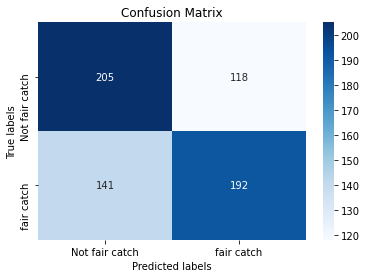

In [40]:
RFC=RandomForestClassifier(n_estimators=80,random_state = 1, max_depth=25,min_samples_leaf = 5).fit(X_train_scaled,y_train.values.ravel())
RFC.fit(X_train_scaled,y_train.values.ravel())
y_pred = RFC.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not fair catch', 'fair catch']); ax.yaxis.set_ticklabels(['Not fair catch', ' fair catch']);
print("Confusion matrix: ")
print(cnf_matrix)

**Decison Tree Classifier** 

Found these to be the best:  
    
    Criterion:  entropy    
    Splitter:  best    
    Confusion matrix:     
        [[539 210]    
         [206 119]]      
    Accuracy: 0.6127    
    Precision: 0.3617    
    Recall: 0.3662    
    AUC: 0.5429     

    max_depth=3       
    Confusion matrix:     
        [[733  16]    
        [313  12]]    
    Accuracy: 0.6937    
    Precision: 0.4286    
    Recall: 0.0369    
    AUC: 0.5078    

In [48]:
for criterion in ["gini","entropy"]:
    for splitter in ["best","random"]:
            print("Criterion: ", criterion)
            print("Splitter: ", splitter)
            calculation(DecisionTreeClassifier(criterion=criterion, splitter=splitter),X_train_scaled, y_train.values.ravel(),X_test_scaled,y_test)

Criterion:  gini
Splitter:  best
Confusion matrix: 
[[174 149]
 [167 166]]

Accuracy: 0.5183
Precision: 0.527
Recall: 0.4985
AUC: 0.5186

Criterion:  gini
Splitter:  random
Confusion matrix: 
[[153 170]
 [169 164]]

Accuracy: 0.4832
Precision: 0.491
Recall: 0.4925
AUC: 0.4831

Criterion:  entropy
Splitter:  best
Confusion matrix: 
[[165 158]
 [148 185]]

Accuracy: 0.5335
Precision: 0.5394
Recall: 0.5556
AUC: 0.5332

Criterion:  entropy
Splitter:  random
Confusion matrix: 
[[174 149]
 [154 179]]

Accuracy: 0.5381
Precision: 0.5457
Recall: 0.5375
AUC: 0.5381



Confusion matrix: 
[[ 65 258]
 [ 63 270]]

Accuracy: 0.5107
Precision: 0.5114
Recall: 0.8108
AUC: 0.506



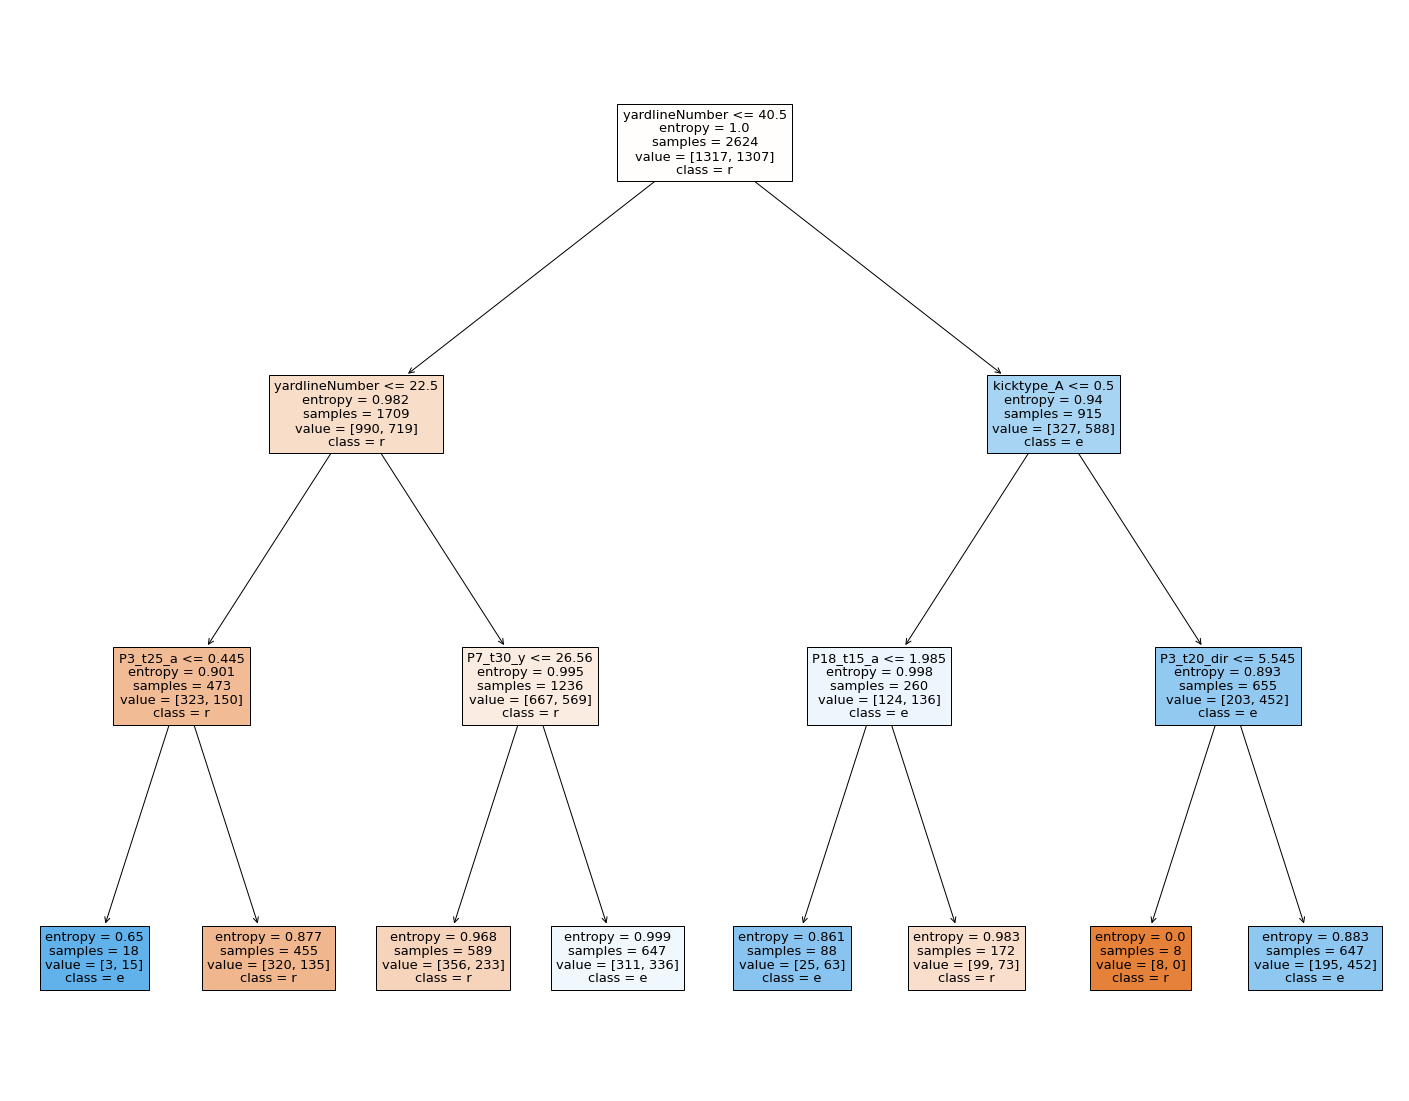

In [33]:
from sklearn import tree
dt3 = DecisionTreeClassifier(criterion='entropy', splitter= 'best', max_depth=3)
dt3= dt3.fit(X_train, y_train)
#y_pred = model_name.predict(X_test)
#visualizing gini-best tree
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(dt3, 
                   feature_names=df_balanced.columns[0:-1],  
                   class_names=df_balanced.columns[1109],
                   filled=True)
#tree.plot_tree(dt3)

calculation(DecisionTreeClassifier(criterion='entropy', splitter= 'best', max_depth=3),X_train, y_train.values.ravel(),X_test_scaled,y_test)

[0.00025215 0.00011969 0.00037073 ... 0.00078484 0.00093476 0.00117371]


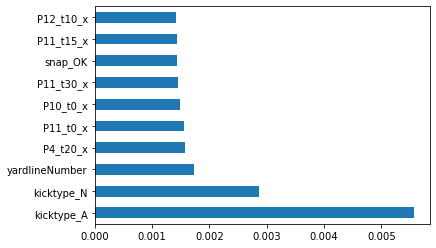

kicktype_A        0.005563
kicktype_N        0.002869
yardlineNumber    0.001737
P4_t20_x          0.001572
P11_t0_x          0.001550
P10_t0_x          0.001478
P11_t30_x         0.001459
snap_OK           0.001431
P11_t15_x         0.001427
P12_t10_x         0.001422
dtype: float64


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y.values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(10))

kicktype_A        0.003645  
yardlineNumber    0.002866  
kicktype_N        0.002737  
P20_t20_x         0.001696  
P18_t0_x          0.001589  
P3_t20_x          0.001446  
P18_t20_x         0.001446  
P14_t5_x          0.001422  
P17_t25_x         0.001360  
P13_t20_x         0.001338  

<h2>Model with all data including 1 second of tracking information</h2>

We repeated the process we used above to build another model but only used one second worth of the tracking data instead of three.

In [51]:
#loop to drop columns for 1 second model
columns=df_balanced[df_balanced.columns]
time=[15,20,25,30]
drop=[]
for i in columns:
    for t in time:
        if('t'+str(t) in i):
            drop.append(i)
            
#print(drop)

In [52]:
dfone=df_balanced.drop(columns=drop)

In [53]:
columnsList = []
for col in dfone.columns:
    columnsList.append(col)
#print(columnsList)

In [54]:
# try building model with only tracking data
# for first second instead of first 3 seconds
X1 = dfone[dfone.columns[0:-1]]
y1 = dfone[['result_Fair Catch']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    test_size=0.20, 
                                                    random_state=0)

scaler = MinMaxScaler()
scaler.fit(X1_train)
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

**Logistic Regression**

Best Logistic Regression - 1 second model   
c=1  
Confusion matrix:   
  [[681  68]  
   [272  53]]  

Accuracy: 0.6834  
Precision: 0.438  
Recall: 0.1631  
AUC: 0.5361   

In [55]:
# Default c = 1
for c in [1,2,3,4,5,6,7,8,9,10]: 
    calculation(LogisticRegression(C=c,max_iter=10000),X1_train_scaled,y1_train.values.ravel(),X1_test_scaled,y1_test)

Confusion matrix: 
[[160 163]
 [141 192]]

Accuracy: 0.5366
Precision: 0.5408
Recall: 0.5766
AUC: 0.536

Confusion matrix: 
[[163 160]
 [138 195]]

Accuracy: 0.5457
Precision: 0.5493
Recall: 0.5856
AUC: 0.5451

Confusion matrix: 
[[164 159]
 [140 193]]

Accuracy: 0.5442
Precision: 0.5483
Recall: 0.5796
AUC: 0.5437

Confusion matrix: 
[[162 161]
 [140 193]]

Accuracy: 0.5412
Precision: 0.5452
Recall: 0.5796
AUC: 0.5406

Confusion matrix: 
[[163 160]
 [142 191]]

Accuracy: 0.5396
Precision: 0.5442
Recall: 0.5736
AUC: 0.5391

Confusion matrix: 
[[165 158]
 [141 192]]

Accuracy: 0.5442
Precision: 0.5486
Recall: 0.5766
AUC: 0.5437

Confusion matrix: 
[[165 158]
 [143 190]]

Accuracy: 0.5412
Precision: 0.546
Recall: 0.5706
AUC: 0.5407

Confusion matrix: 
[[162 161]
 [143 190]]

Accuracy: 0.5366
Precision: 0.5413
Recall: 0.5706
AUC: 0.5361

Confusion matrix: 
[[161 162]
 [143 190]]

Accuracy: 0.5351
Precision: 0.5398
Recall: 0.5706
AUC: 0.5345

Confusion matrix: 
[[161 162]
 [144 189]]

Accur

**Random Forest Clasifier**

Best for Random Forest - 1 second  
 Size:  50  
Confusion matrix:   
    [[706  43]  
     [289  36]]  

Accuracy: 0.6909  
Precision: 0.4557  
Recall: 0.1108  
AUC: 0.5267  

In [56]:
for size in range(50,160,10): 
    print("Size: ", size)
    calculation(RandomForestClassifier(n_estimators=size,random_state = 1),X1_train_scaled,y1_train.values.ravel(),X1_test_scaled,y1_test)

Size:  50
Confusion matrix: 
[[193 130]
 [170 163]]

Accuracy: 0.5427
Precision: 0.5563
Recall: 0.4895
AUC: 0.5435

Size:  60
Confusion matrix: 
[[188 135]
 [167 166]]

Accuracy: 0.5396
Precision: 0.5515
Recall: 0.4985
AUC: 0.5403

Size:  70
Confusion matrix: 
[[186 137]
 [155 178]]

Accuracy: 0.5549
Precision: 0.5651
Recall: 0.5345
AUC: 0.5552

Size:  80
Confusion matrix: 
[[186 137]
 [158 175]]

Accuracy: 0.5503
Precision: 0.5609
Recall: 0.5255
AUC: 0.5507

Size:  90
Confusion matrix: 
[[189 134]
 [156 177]]

Accuracy: 0.5579
Precision: 0.5691
Recall: 0.5315
AUC: 0.5583

Size:  100
Confusion matrix: 
[[193 130]
 [155 178]]

Accuracy: 0.5655
Precision: 0.5779
Recall: 0.5345
AUC: 0.566

Size:  110
Confusion matrix: 
[[194 129]
 [157 176]]

Accuracy: 0.564
Precision: 0.577
Recall: 0.5285
AUC: 0.5646

Size:  120
Confusion matrix: 
[[197 126]
 [155 178]]

Accuracy: 0.5716
Precision: 0.5855
Recall: 0.5345
AUC: 0.5722

Size:  130
Confusion matrix: 
[[191 132]
 [156 177]]

Accuracy: 0.561
Pr

In [ ]:
modelRF = RandomForest

**Decision Tree**

Best DT - 1 second
Criterion:  gini  
Splitter:  best  
Confusion matrix:   
[[526 223]  
 [211 114]]  

Accuracy: 0.5959  
Precision: 0.3383  
Recall: 0.3508  
AUC: 0.5265  

with max_depth=3  
Confusion matrix:   
[[654  95]  
 [236  89]]  

Accuracy: 0.6918  
Precision: 0.4837  
Recall: 0.2738  
AUC: 0.5735  

In [57]:
#gini, best 
for criterion in ["gini","entropy"]:
    for splitter in ["best","random"]:
        print("Criterion: ", criterion)
        print("Splitter: ", splitter)
        calculation(DecisionTreeClassifier(criterion=criterion, splitter=splitter),X1_train_scaled, y1_train.values.ravel(),X1_test_scaled,y1_test)

Criterion:  gini
Splitter:  best
Confusion matrix: 
[[163 160]
 [159 174]]

Accuracy: 0.5137
Precision: 0.521
Recall: 0.5225
AUC: 0.5136

Criterion:  gini
Splitter:  random
Confusion matrix: 
[[174 149]
 [149 184]]

Accuracy: 0.5457
Precision: 0.5526
Recall: 0.5526
AUC: 0.5456

Criterion:  entropy
Splitter:  best
Confusion matrix: 
[[188 135]
 [152 181]]

Accuracy: 0.5625
Precision: 0.5728
Recall: 0.5435
AUC: 0.5628

Criterion:  entropy
Splitter:  random
Confusion matrix: 
[[159 164]
 [161 172]]

Accuracy: 0.5046
Precision: 0.5119
Recall: 0.5165
AUC: 0.5044



Confusion matrix: 
[[152 171]
 [110 223]]

Accuracy: 0.5716
Precision: 0.566
Recall: 0.6697
AUC: 0.5701



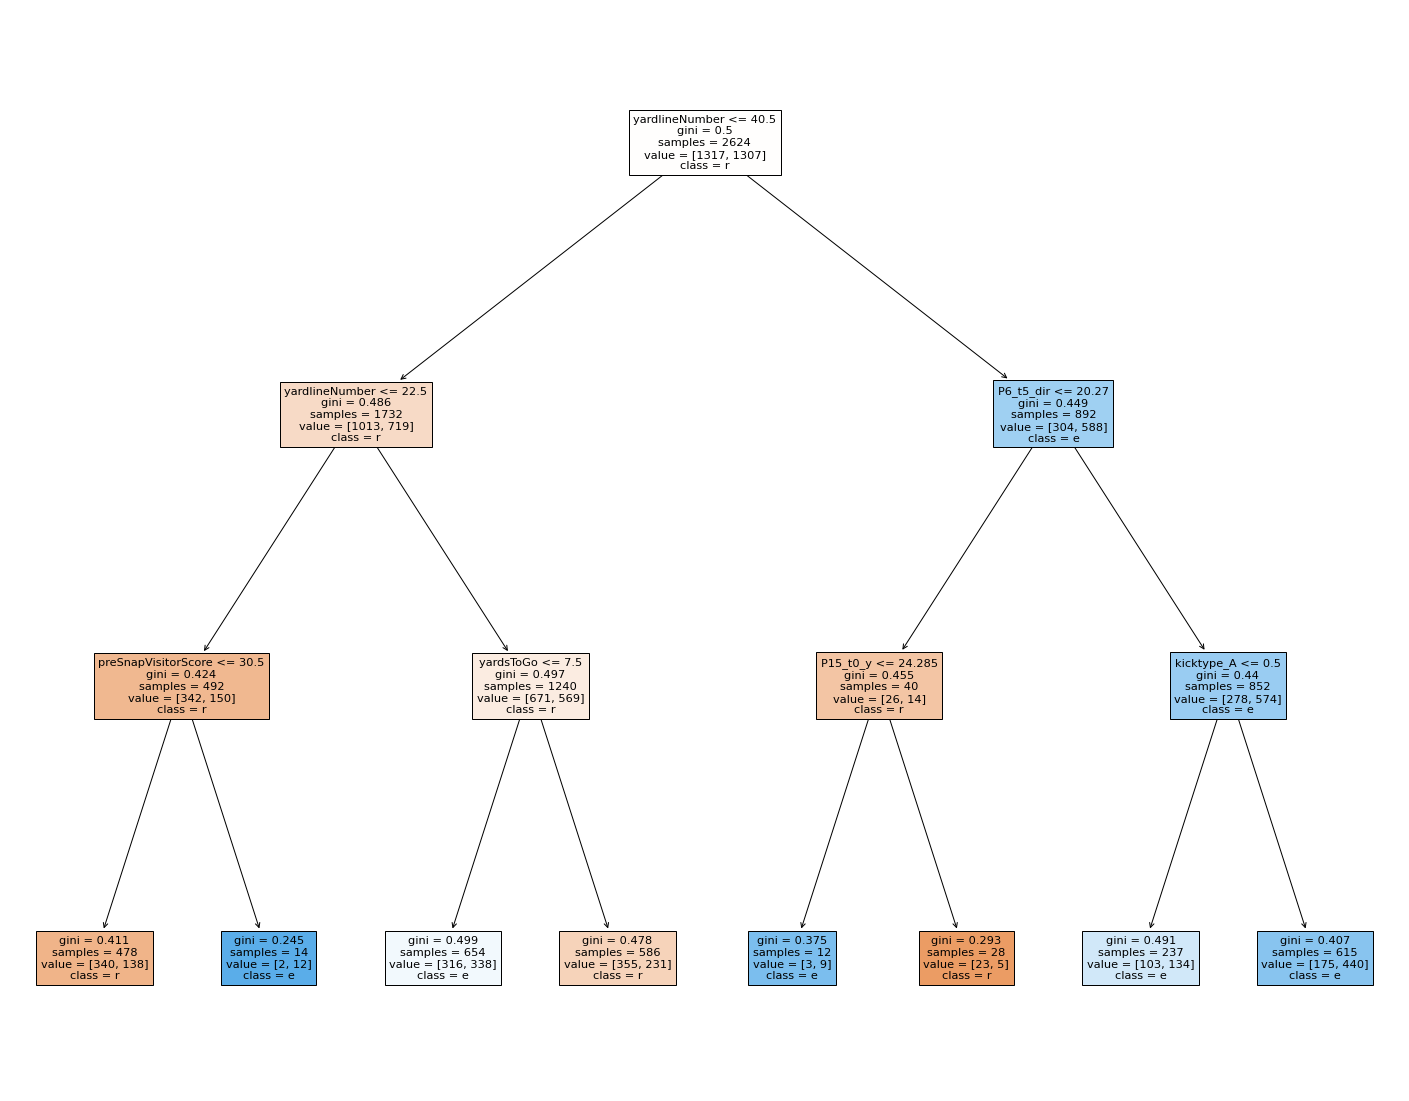

In [58]:
from sklearn import tree
dt1 = DecisionTreeClassifier(criterion='gini', splitter= 'best', max_depth=3)
dt1= dt1.fit(X1_train, y1_train.values.ravel())
#y_pred = model_name.predict(X_test)
#visualizing gini-best tree
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(dt1, 
                   feature_names=dfone.columns[0:-1],
                   class_names=dfone.columns[493],
                   filled=True)
#tree.plot_tree(dt1)
calculation(DecisionTreeClassifier(criterion='gini', splitter= 'best', max_depth=3),X1_train_scaled, y1_train.values.ravel(),X1_test_scaled,y1_test)


**K Nearest Neighbors**  
Best KNN- 1 second model   
Distance metric:  Euclidean  
k:  10  
Confusion matrix:   
[[686  63]  
 [280  45]]  

Accuracy: 0.6806  
Precision: 0.4167   
Recall: 0.1385  
AUC: 0.5272  

In [59]:
# Default is p = 2, k = 5
for p in [1, 2]: 
    for k in [1,2,3,4,5,6,7,8,9,10]: 
        distance = {1: "Manhattan", 2: "Euclidean"}
        print("Distance metric: ", distance[p])
        print("k: ", k)
        calculation(KNeighborsClassifier(p=p,n_neighbors=k),X1_train_scaled,y1_train.values.ravel(),X1_test_scaled,y1_test)

Distance metric:  Manhattan
k:  1
Confusion matrix: 
[[169 154]
 [139 194]]

Accuracy: 0.5534
Precision: 0.5575
Recall: 0.5826
AUC: 0.5529

Distance metric:  Manhattan
k:  2
Confusion matrix: 
[[231  92]
 [220 113]]

Accuracy: 0.5244
Precision: 0.5512
Recall: 0.3393
AUC: 0.5273

Distance metric:  Manhattan
k:  3
Confusion matrix: 
[[163 160]
 [148 185]]

Accuracy: 0.5305
Precision: 0.5362
Recall: 0.5556
AUC: 0.5301

Distance metric:  Manhattan
k:  4
Confusion matrix: 
[[213 110]
 [203 130]]

Accuracy: 0.5229
Precision: 0.5417
Recall: 0.3904
AUC: 0.5249

Distance metric:  Manhattan
k:  5
Confusion matrix: 
[[149 174]
 [153 180]]

Accuracy: 0.5015
Precision: 0.5085
Recall: 0.5405
AUC: 0.5009

Distance metric:  Manhattan
k:  6
Confusion matrix: 
[[191 132]
 [192 141]]

Accuracy: 0.5061
Precision: 0.5165
Recall: 0.4234
AUC: 0.5074

Distance metric:  Manhattan
k:  7
Confusion matrix: 
[[150 173]
 [145 188]]

Accuracy: 0.5152
Precision: 0.5208
Recall: 0.5646
AUC: 0.5145

Distance metric:  Ma

<h2>Model using only three seconds of the tracking data </h2>

In [61]:
#deleting everything except positonaltracking data 
drop=[]
columns=df_balanced.columns
for i in columns:
    if(i!='P1_t0_x'):
        drop.append(i)
    else:
         break
#print(drop)
dfpos= df_balanced.drop(columns= drop)

In [62]:
Xp = dfpos[dfpos.columns[0:-1]]
yp = dfpos[['result_Fair Catch']]
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, 
                                                    test_size=0.20, 
                                                    random_state=0)

scaler = MinMaxScaler()
scaler.fit(Xp_train)
Xp_train_scaled = scaler.transform(Xp_train)
Xp_test_scaled = scaler.transform(Xp_test)

**Logistic Regression**

Best Logistic Regression - 3 second only tracking
Confusion matrix:   
[[657  92]  
 [266  59]]  
  
Accuracy: 0.6667  
Precision: 0.3907  
Recall: 0.1815  
AUC: 0.5294  

In [63]:
# Default c = 1 
for c in [1,2,3,4,5,6,7,8,9,10]: 
    calculation(LogisticRegression(C=c,max_iter=10000),Xp_train_scaled,yp_train.values.ravel(),Xp_test_scaled,yp_test)

Confusion matrix: 
[[171 152]
 [172 161]]

Accuracy: 0.5061
Precision: 0.5144
Recall: 0.4835
AUC: 0.5064

Confusion matrix: 
[[168 155]
 [170 163]]

Accuracy: 0.5046
Precision: 0.5126
Recall: 0.4895
AUC: 0.5048

Confusion matrix: 
[[164 159]
 [171 162]]

Accuracy: 0.497
Precision: 0.5047
Recall: 0.4865
AUC: 0.4971

Confusion matrix: 
[[162 161]
 [171 162]]

Accuracy: 0.4939
Precision: 0.5015
Recall: 0.4865
AUC: 0.494

Confusion matrix: 
[[162 161]
 [171 162]]

Accuracy: 0.4939
Precision: 0.5015
Recall: 0.4865
AUC: 0.494

Confusion matrix: 
[[162 161]
 [172 161]]

Accuracy: 0.4924
Precision: 0.5
Recall: 0.4835
AUC: 0.4925

Confusion matrix: 
[[162 161]
 [172 161]]

Accuracy: 0.4924
Precision: 0.5
Recall: 0.4835
AUC: 0.4925

Confusion matrix: 
[[163 160]
 [172 161]]

Accuracy: 0.4939
Precision: 0.5016
Recall: 0.4835
AUC: 0.4941

Confusion matrix: 
[[164 159]
 [171 162]]

Accuracy: 0.497
Precision: 0.5047
Recall: 0.4865
AUC: 0.4971

Confusion matrix: 
[[166 157]
 [170 163]]

Accuracy: 0.5

**Random Forest Classifier**

Best RFC - 3 second tracking  
Size:  140  
Confusion matrix:   
[[717  32]  
 [305  20]]  

Accuracy: 0.6862   
Precision: 0.3846  
Recall: 0.0615  
AUC: 0.5094  

In [64]:
for size in range(50,160,10): 
    print("Size: ", size)
    calculation(RandomForestClassifier(n_estimators=size,random_state = 1),Xp_train_scaled,yp_train.values.ravel(),Xp_test_scaled,yp_test)

Size:  50
Confusion matrix: 
[[181 142]
 [145 188]]

Accuracy: 0.5625
Precision: 0.5697
Recall: 0.5646
AUC: 0.5625

Size:  60
Confusion matrix: 
[[174 149]
 [148 185]]

Accuracy: 0.5473
Precision: 0.5539
Recall: 0.5556
AUC: 0.5471

Size:  70
Confusion matrix: 
[[177 146]
 [141 192]]

Accuracy: 0.5625
Precision: 0.568
Recall: 0.5766
AUC: 0.5623

Size:  80
Confusion matrix: 
[[183 140]
 [142 191]]

Accuracy: 0.5701
Precision: 0.577
Recall: 0.5736
AUC: 0.5701

Size:  90
Confusion matrix: 
[[176 147]
 [144 189]]

Accuracy: 0.5564
Precision: 0.5625
Recall: 0.5676
AUC: 0.5562

Size:  100
Confusion matrix: 
[[176 147]
 [143 190]]

Accuracy: 0.5579
Precision: 0.5638
Recall: 0.5706
AUC: 0.5577

Size:  110
Confusion matrix: 
[[175 148]
 [142 191]]

Accuracy: 0.5579
Precision: 0.5634
Recall: 0.5736
AUC: 0.5577

Size:  120
Confusion matrix: 
[[175 148]
 [142 191]]

Accuracy: 0.5579
Precision: 0.5634
Recall: 0.5736
AUC: 0.5577

Size:  130
Confusion matrix: 
[[174 149]
 [143 190]]

Accuracy: 0.5549


**Decision Tree Clasifier**  
Best Decision Tree - 3 second positional data model    
Criterion:  gini  
Splitter:  random  
Confusion matrix:   
[[518 231]  
 [199 126]]  

Accuracy: 0.5996  
Precision: 0.3529  
Recall: 0.3877  
AUC: 0.5396  

Confusion matrix: 
[[167 156]
 [156 177]]

Accuracy: 0.5244
Precision: 0.5315
Recall: 0.5315
AUC: 0.5243



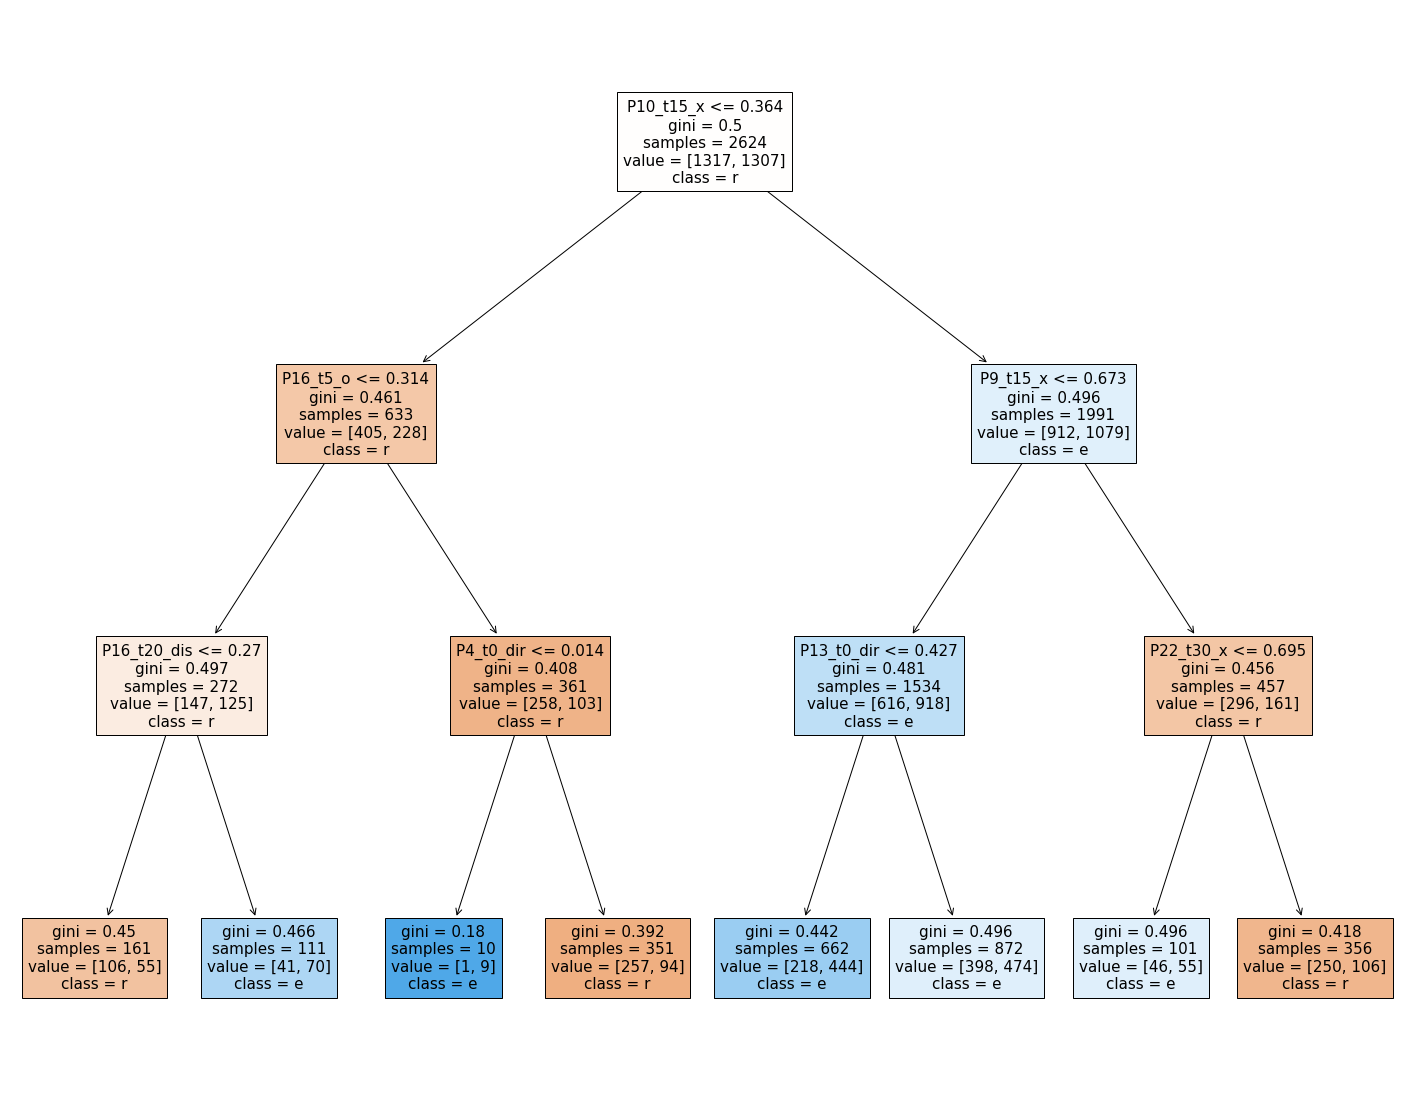

In [65]:
from sklearn import tree
#gini random is the best one from down below so thats why I plot it 
dtp = DecisionTreeClassifier(criterion='gini', splitter= 'random')
dtp= dt1.fit(Xp_train_scaled, yp_train.values.ravel())
#y_pred = model_name.predict(X_test)
#visualizing gini-best tree
fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(dtp, 
                   feature_names=dfpos.columns[0:-1],
                   class_names=dfpos.columns[1078],
                   filled=True)
#tree.plot_tree(dtp)
calculation(DecisionTreeClassifier(criterion='gini', splitter= 'random'),Xp_train_scaled, yp_train.values.ravel(),Xp_test_scaled,yp_test)


In [66]:
for criterion in ["gini","entropy"]:
    for splitter in ["best","random"]:
        print("Criterion: ", criterion)
        print("Splitter: ", splitter)
        calculation(DecisionTreeClassifier(criterion=criterion, splitter=splitter),Xp_train_scaled, yp_train.values.ravel(),Xp_test_scaled,yp_test)

Criterion:  gini
Splitter:  best
Confusion matrix: 
[[159 164]
 [145 188]]

Accuracy: 0.529
Precision: 0.5341
Recall: 0.5646
AUC: 0.5284

Criterion:  gini
Splitter:  random
Confusion matrix: 
[[167 156]
 [170 163]]

Accuracy: 0.503
Precision: 0.511
Recall: 0.4895
AUC: 0.5033

Criterion:  entropy
Splitter:  best
Confusion matrix: 
[[155 168]
 [163 170]]

Accuracy: 0.4954
Precision: 0.503
Recall: 0.5105
AUC: 0.4952

Criterion:  entropy
Splitter:  random
Confusion matrix: 
[[161 162]
 [166 167]]

Accuracy: 0.5
Precision: 0.5076
Recall: 0.5015
AUC: 0.5



**K Nearest Neighbor**  
best KNN - 3 second positional data model     
Distance metric:  Manhattan  
k:  10  
Confusion matrix:   
[[691  58]  
 [279  46]]  

Accuracy: 0.6862  
Precision: 0.4423  
Recall: 0.1415  
AUC: 0.5321  


In [ ]:
for p in [1, 2]: 
    for k in [1,2,3,4,5,6,7,8,9,10]: 
        distance = {1: "Manhattan", 2: "Euclidean"}
        print("Distance metric: ", distance[p])
        print("k: ", k)
        calculation(KNeighborsClassifier(p=p,n_neighbors=k),Xp_train_scaled,yp_train.values.ravel(),Xp_test_scaled,yp_test)

<h2> 1 Second tracking data model </h2>

In [ ]:
#positional data 1 second model 
columns=dfpos[dfpos.columns]
time=[15,20,25,30]
drop=[]
for i in columns:
    for t in time:
        if('t'+str(t) in i):
            drop.append(i)
dfpos1=dfpos.drop(columns=drop)


In [ ]:
Xp1 = dfpos1[dfpos1.columns[0:-1]]
yp1 = dfpos1[['result_Fair Catch']]
Xp1_train, Xp1_test, yp1_train, yp1_test = train_test_split(Xp1, yp1, 
                                                    test_size=0.20, 
                                                    random_state=0)

scaler = MinMaxScaler()
scaler.fit(Xp1_train)
Xp1_train_scaled = scaler.transform(Xp1_train)
Xp1_test_scaled = scaler.transform(Xp1_test)

**Logistic Regression**

Best Logistic Regression- 1 second tracking
Confusion matrix:   
[[717  32]  
 [318   7]]  

Accuracy: 0.6741  
Precision: 0.1795  
Recall: 0.0215  
AUC: 0.4894  

In [ ]:
# Default c = 1 
for c in [1,2,3,4,5,6,7,8,9,10]: 
    calculation(LogisticRegression(C=c,max_iter=10000),Xp1_train_scaled,yp1_train.values.ravel(),Xp1_test_scaled,yp1_test)

**Random Forest** 

Best RFC - 1 second tracking
Size:  150  
Confusion matrix:   
[[715  34]  
 [303  22]]  

Accuracy: 0.6862  
Precision: 0.3929  
Recall: 0.0677  
AUC: 0.5111  

In [ ]:
for size in range(50,160,10): 
    print("Size: ", size)
    calculation(RandomForestClassifier(n_estimators=size,random_state = 1),Xp1_train_scaled,yp1_train.values.ravel(),Xp1_test_scaled,yp1_test)

**Decision Tree**

Best Decision Tree - 1 second tracking

In [ ]:
for criterion in ["gini","entropy"]:
    for splitter in ["best","random"]:
        print("Criterion: ", criterion)
        print("Splitter: ", splitter)
        calculation(DecisionTreeClassifier(criterion=criterion, splitter=splitter),Xp1_train_scaled, yp1_train.values.ravel(),Xp1_test_scaled,yp1_test)

**KNN**

Best KNN- 1 second tracking

Distance metric:  Euclidean  
k:  10  
Confusion matrix:   
[[690  59]  
 [281  44]]  

Accuracy: 0.6834  
Precision: 0.4272  
Recall: 0.1354  
AUC: 0.5283  

In [ ]:
for p in [1, 2]: 
    for k in [1,2,3,4,5,6,7,8,9,10]: 
        distance = {1: "Manhattan", 2: "Euclidean"}
        print("Distance metric: ", distance[p])
        print("k: ", k)
        calculation(KNeighborsClassifier(p=p,n_neighbors=k),Xp1_train_scaled,yp1_train.values.ravel(),Xp1_test_scaled,yp1_test)

**SVM**

In [ ]:
for c in range(1, 21,2):
    c = c / 10
    print("C: ", c)
    calculation(SVC(C = c),Xp1_train_scaled,yp1_train.values.ravel(),Xp1_test_scaled,yp1_test)